In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [6]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [7]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [8]:
xtrain.shape,xtest.shape

((712, 3), (179, 3))

In [9]:
mean_age = xtrain['Age'].mean()
median_age = xtest['Age'].median()

mean_fare = xtrain['Fare'].mean()
median_fare = xtest['Fare'].median()

In [10]:
xtrain['age_mean'] = xtrain['Age'].fillna(mean_age)
xtrain['age_median'] = xtrain['Age'].fillna(median_age)

xtrain['fare_mean'] = xtrain['Fare'].fillna(mean_fare)
xtrain['fare_median'] = xtrain['Fare'].fillna(median_fare)

In [11]:
xtrain.sample(5)

,Age,Fare,Family,age_mean,age_median,fare_mean,fare_median
791,16.0,26.0000,0,16.0,16.0,26.0000,26.0000
38,18.0,18.0000,2,18.0,18.0,18.0000,18.0000
877,19.0,7.8958,0,19.0,19.0,7.8958,7.8958
33,66.0,10.5000,0,66.0,66.0,10.5000,10.5000
131,20.0,7.0500,0,20.0,20.0,7.0500,7.0500


<Axes: >

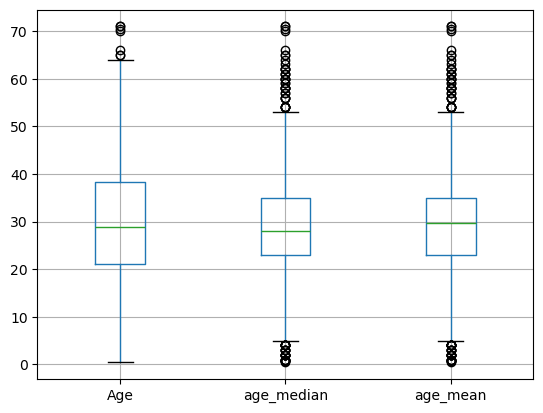

In [12]:
xtrain[['Age','age_median','age_mean']].boxplot()                                             #outliners found after imputation

In [13]:
xtrain[['Age','age_median','age_mean']].boxplot()  

<Axes: >

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=2)

In [17]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [18]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [19]:
trf.fit(xtrain)

D:\New folder\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [21]:
trf.named_transformers_['imputer1'].statistics_                   #median value of age

array([28.75])

In [23]:
trf.named_transformers_['imputer2'].statistics_           #mean value of Fare

array([32.61759689])